## **01. 간단한 RNN을 구현**

In [1]:
import tensorflow as tf
import keras

print(tf.__version__)
print(keras.__version__)

2.3.0
2.4.3


In [2]:
import numpy as np

for i in range(10):
    lst = list(range(i, i+5))
    print(lst)

[0, 1, 2, 3, 4]
[1, 2, 3, 4, 5]
[2, 3, 4, 5, 6]
[3, 4, 5, 6, 7]
[4, 5, 6, 7, 8]
[5, 6, 7, 8, 9]
[6, 7, 8, 9, 10]
[7, 8, 9, 10, 11]
[8, 9, 10, 11, 12]
[9, 10, 11, 12, 13]


In [3]:
X = []
Y = []
for i in range(10):
    lst = list(range(i, i+5))
    X.append( [ [c/10] for c in lst]  )  # 문제
    Y.append( (i+5)/10  )  #
    
X = np.array(X)
Y = np.array(Y)

print( X.shape, Y.shape ) # 10개의 샘플 (5,1), 다음 0.5
print( X[0], Y[0])
print()
print( X[1], Y[1])
print()
print(Y)
print(X)

(10, 5, 1) (10,)
[[0. ]
 [0.1]
 [0.2]
 [0.3]
 [0.4]] 0.5

[[0.1]
 [0.2]
 [0.3]
 [0.4]
 [0.5]] 0.6

[0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4]
[[[0. ]
  [0.1]
  [0.2]
  [0.3]
  [0.4]]

 [[0.1]
  [0.2]
  [0.3]
  [0.4]
  [0.5]]

 [[0.2]
  [0.3]
  [0.4]
  [0.5]
  [0.6]]

 [[0.3]
  [0.4]
  [0.5]
  [0.6]
  [0.7]]

 [[0.4]
  [0.5]
  [0.6]
  [0.7]
  [0.8]]

 [[0.5]
  [0.6]
  [0.7]
  [0.8]
  [0.9]]

 [[0.6]
  [0.7]
  [0.8]
  [0.9]
  [1. ]]

 [[0.7]
  [0.8]
  [0.9]
  [1. ]
  [1.1]]

 [[0.8]
  [0.9]
  [1. ]
  [1.1]
  [1.2]]

 [[0.9]
  [1. ]
  [1.1]
  [1.2]
  [1.3]]]


In [4]:
# 전체 데이터 확인
for i in range(len(X)):
    print(X[i], Y[i])
print( X.shape, Y.shape )

[[0. ]
 [0.1]
 [0.2]
 [0.3]
 [0.4]] 0.5
[[0.1]
 [0.2]
 [0.3]
 [0.4]
 [0.5]] 0.6
[[0.2]
 [0.3]
 [0.4]
 [0.5]
 [0.6]] 0.7
[[0.3]
 [0.4]
 [0.5]
 [0.6]
 [0.7]] 0.8
[[0.4]
 [0.5]
 [0.6]
 [0.7]
 [0.8]] 0.9
[[0.5]
 [0.6]
 [0.7]
 [0.8]
 [0.9]] 1.0
[[0.6]
 [0.7]
 [0.8]
 [0.9]
 [1. ]] 1.1
[[0.7]
 [0.8]
 [0.9]
 [1. ]
 [1.1]] 1.2
[[0.8]
 [0.9]
 [1. ]
 [1.1]
 [1.2]] 1.3
[[0.9]
 [1. ]
 [1.1]
 [1.2]
 [1.3]] 1.4
(10, 5, 1) (10,)


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN

In [6]:
model = Sequential()
model.add(SimpleRNN(10, return_sequences=True, input_shape=[5,1]))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 5, 10)             120       
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [7]:
model = Sequential()
model.add(SimpleRNN(10, return_sequences=False, input_shape=[5,1]))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 10)                120       
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 10)                120       
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.fit(X, Y, epochs=50, verbose=1)

Epoch 1/50
1/1 [==============================] - 0s 2ms/step - loss: 1.1248
Epoch 2/50
1/1 [==============================] - 0s 2ms/step - loss: 1.1163
Epoch 3/50
1/1 [==============================] - 0s 2ms/step - loss: 1.1080
Epoch 4/50
1/1 [==============================] - 0s 5ms/step - loss: 1.0998
Epoch 5/50
1/1 [==============================] - 0s 3ms/step - loss: 1.0918
Epoch 6/50
1/1 [==============================] - 0s 4ms/step - loss: 1.0840
Epoch 7/50
1/1 [==============================] - 0s 3ms/step - loss: 1.0762
Epoch 8/50
1/1 [==============================] - 0s 3ms/step - loss: 1.0686
Epoch 9/50
1/1 [==============================] - 0s 6ms/step - loss: 1.0612
Epoch 10/50
1/1 [==============================] - 0s 5ms/step - loss: 1.0539
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss: 1.0467
Epoch 12/50
1/1 [==============================] - 0s 3ms/step - loss: 1.0396
Epoch 13/50
1/1 [==============================] - 0s 2ms/step - loss: 1.

In [10]:
print(X.shape, X)

(10, 5, 1) [[[0. ]
  [0.1]
  [0.2]
  [0.3]
  [0.4]]

 [[0.1]
  [0.2]
  [0.3]
  [0.4]
  [0.5]]

 [[0.2]
  [0.3]
  [0.4]
  [0.5]
  [0.6]]

 [[0.3]
  [0.4]
  [0.5]
  [0.6]
  [0.7]]

 [[0.4]
  [0.5]
  [0.6]
  [0.7]
  [0.8]]

 [[0.5]
  [0.6]
  [0.7]
  [0.8]
  [0.9]]

 [[0.6]
  [0.7]
  [0.8]
  [0.9]
  [1. ]]

 [[0.7]
  [0.8]
  [0.9]
  [1. ]
  [1.1]]

 [[0.8]
  [0.9]
  [1. ]
  [1.1]
  [1.2]]

 [[0.9]
  [1. ]
  [1.1]
  [1.2]
  [1.3]]]


In [11]:
print(Y) # 실제값
pred = model.predict(X)
np.max(pred, axis=0)

[0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4]


array([ 0.49797115,  0.809857  ,  0.6319803 , -0.02789665,  0.8746373 ,
        0.78671837,  0.43467554,  0.03327867,  0.46775845, -0.4574916 ],
      dtype=float32)

## **02. SimpleRNN 기본 이해**

In [12]:
import keras
from keras.layers import SimpleRNN

print( keras.__version__ )

2.4.3


In [13]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

In [14]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=False))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [15]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [16]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # 맨 위 층만 마지막 출력을 반환합니다.
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [17]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000  # 특성으로 사용할 단어의 수
maxlen = 500    # 사용할 텍스트의 길이(가장 빈번한 max_features 개의 단어만 사용합니다)
batch_size = 32

print('데이터 로딩...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), '훈련 시퀀스')
print(len(input_test), '테스트 시퀀스')

데이터 로딩...
25000 훈련 시퀀스
25000 테스트 시퀀스


In [18]:
# 문장에서 maxlen 이후의 있는 단어들을 pad_sequences()함수로 잘라낸다.
# 문장 길이가 maxlen보다 작으면 부족한 부분을 0으로 채웁니다. 
print('시퀀스 패딩 (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train 크기:', input_train.shape)
print('input_test 크기:', input_test.shape)

시퀀스 패딩 (samples x time)
input_train 크기: (25000, 500)
input_test 크기: (25000, 500)


In [19]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32)) # max_features = 10000
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [20]:
%%time

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 24s 154ms/step - loss: 0.6382 - acc: 0.6220 - val_loss: 0.5762 - val_acc: 0.6944
Epoch 2/10
157/157 [==============================] - 26s 165ms/step - loss: 0.4068 - acc: 0.8296 - val_loss: 0.4216 - val_acc: 0.8118
Epoch 3/10
157/157 [==============================] - 27s 170ms/step - loss: 0.2970 - acc: 0.8837 - val_loss: 0.3702 - val_acc: 0.8490
Epoch 4/10
157/157 [==============================] - 27s 170ms/step - loss: 0.2426 - acc: 0.9068 - val_loss: 0.3599 - val_acc: 0.8522
Epoch 5/10
157/157 [==============================] - 26s 164ms/step - loss: 0.1907 - acc: 0.9308 - val_loss: 0.4768 - val_acc: 0.8004
Epoch 6/10
157/157 [==============================] - 25s 162ms/step - loss: 0.1393 - acc: 0.9517 - val_loss: 0.3967 - val_acc: 0.8470
Epoch 7/10
157/157 [==============================] - 26s 169ms/step - loss: 0.0964 - acc: 0.9678 - val_loss: 0.4561 - val_acc: 0.8284
Epoch 8/10
157/157 [==============================] - 2

## **검증 정확도 : 83%**

In [21]:
# 학습 후, 정확도 및 손실 그래프 확인
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

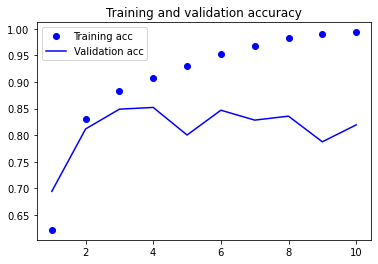

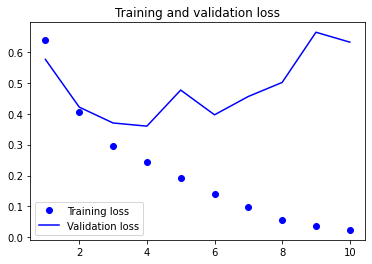

In [22]:
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## **03. LSTM 기본 이해**

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN
from tensorflow.keras.layers import LSTM

from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt

In [24]:
max_features = 10000  # 특성으로 사용할 단어의 수
maxlen = 500    # 텍스트의 길이(가장 빈번한 max_features 개의 단어만 사용합니다)
batch_size = 32 # 배치 데이터 사이즈

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), '훈련 시퀀스')
print(len(input_test), '테스트 시퀀스')
print(input_train[0], y_train[0])

25000 훈련 시퀀스
25000 테스트 시퀀스
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32] 1


In [25]:
# 리스트를 (samples, maxlen)크기의 2D 정수 텐서로 변환
print('시퀀스 패딩 (samples x time)')
print('input_train 크기:', input_train.shape)
print('input_test 크기:', input_test.shape)
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train 크기:', input_train.shape)
print('input_test 크기:', input_test.shape)

시퀀스 패딩 (samples x time)
input_train 크기: (25000,)
input_test 크기: (25000,)
input_train 크기: (25000, 500)
input_test 크기: (25000, 500)


In [26]:
model = Sequential()
model.add(Embedding(max_features, 32))

model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

In [27]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [29]:
%%time

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 57s 360ms/step - loss: 0.5361 - acc: 0.7481 - val_loss: 0.3559 - val_acc: 0.8624
Epoch 2/10
157/157 [==============================] - 57s 363ms/step - loss: 0.3095 - acc: 0.8790 - val_loss: 0.3190 - val_acc: 0.8686
Epoch 3/10
157/157 [==============================] - 66s 423ms/step - loss: 0.2361 - acc: 0.9093 - val_loss: 0.3217 - val_acc: 0.8792
Epoch 4/10
157/157 [==============================] - 63s 401ms/step - loss: 0.2016 - acc: 0.9255 - val_loss: 0.2943 - val_acc: 0.8926
Epoch 5/10
157/157 [==============================] - 63s 400ms/step - loss: 0.1795 - acc: 0.9354 - val_loss: 0.3159 - val_acc: 0.8808
Epoch 6/10
157/157 [==============================] - 58s 368ms/step - loss: 0.1569 - acc: 0.9441 - val_loss: 0.3802 - val_acc: 0.8662
Epoch 7/10
157/157 [==============================] - 57s 363ms/step - loss: 0.1425 - acc: 0.9491 - val_loss: 0.3087 - val_acc: 0.8856
Epoch 8/10
157/157 [==============================] - 5

In [30]:
model.evaluate(input_test, y_test)

782/782 [==============================] - 43s 55ms/step - loss: 0.4641 - acc: 0.8645


[0.46414443850517273, 0.8644800186157227]

In [31]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

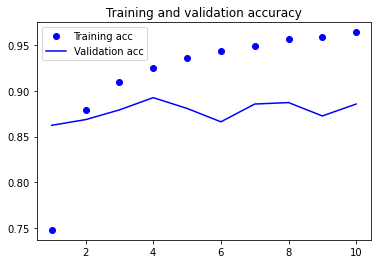

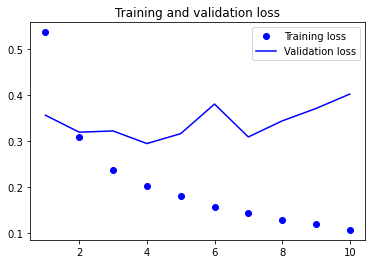

In [32]:
epochs = range(1, len(acc) + 1)

# 정확도
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

# 
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()